In [50]:
% some housekeeping stuff
register_graphics_toolkit("gnuplot");
available_graphics_toolkits();
graphics_toolkit("gnuplot")
clear
% end of housekeeping

# ionic strength effect on pH of acetic acid

see notes for description

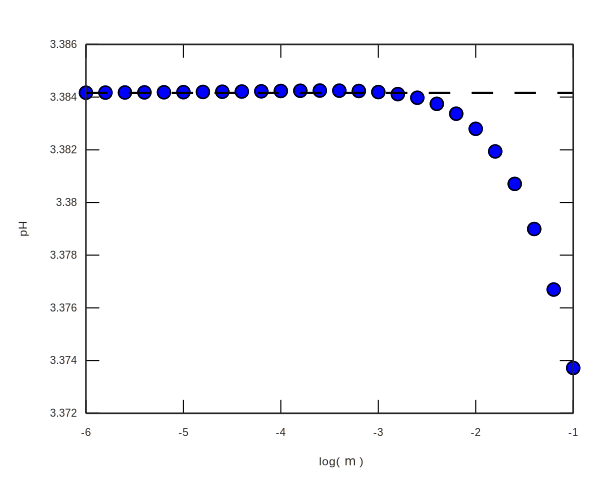

In [51]:
%plot -s 600,500 -f 'svg'
logmu=-6:0.2:-1; mu=10.^logmu; AT=0.01; Ka=10^-4.75; sizeH=900; sizeAc=450;

%zero ionic strength
a=1; b=Ka; c=-Ka*AT; t=roots([a b c]); t(imag(t)==0); t=t(t>0); pHzero=-log10(t);

for i=1:length(logmu)
    loggammaH=-0.51*sqrt(mu(i))/(1+((sizeH/350)*sqrt(mu(i)))); gammaH=10^loggammaH;
    loggammaAc=-0.51*sqrt(mu(i))/(1+((sizeAc/350)*sqrt(mu(i)))); gammaAc=10^loggammaAc;
    Kaprime=Ka/(gammaH*gammaAc);
    a=1; b=Kaprime; c=-Kaprime*AT;
    t=roots([a b c]); 
    t(imag(t)==0); %sets any imaginary roots to zero
    t=t(t>0); %t=positive real roots
    pH(i)=-log10(t*gammaH);
end

plot(logmu,pH,'ko','markersize',4,'markerfacecolor','b')
set(gca,'linewidth',1.5)
xlabel('log(\mu)'); ylabel('pH')
hold on
plot(logmu,pHzero*ones(size(logmu)),'k--','linewidth',2)